In [1]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
import random

In [2]:
drive.mount('/content/drive')
path = 'drive/MyDrive/ASD_Research/'
data = pd.read_csv(path + 'combined.csv')

Mounted at /content/drive


In [3]:
print(data.head())

   A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age  Sex  Ethnicity  Jaundice  \
0   0   0   0   0   0   0   1   1   0    1    2    0          4         1   
1   1   1   0   0   0   1   1   0   0    0    3    1          0         1   
2   1   0   0   0   0   0   1   1   0    1    3    1          4         1   
3   1   1   1   1   1   1   1   1   1    1    2    1          3         0   
4   1   1   0   1   1   1   1   1   1    1    2    0          0         0   

   ASD_traits  
0           0  
1           1  
2           1  
3           1  
4           1  


In [4]:
x_vals = data.iloc[:, 0:10]
y_vals = data.iloc[:, 14]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(
    x_vals, y_vals, test_size=0.2, random_state=481880
)

rf = RandomForestClassifier(
    oob_score=False,
    n_estimators=200,
    min_weight_fraction_leaf=0,
    min_samples_split=15,
    min_samples_leaf=8,
    max_leaf_nodes=40,
    max_features="sqrt",
    max_depth=40,
    class_weight="balanced",
    ccp_alpha=0,
    bootstrap=True,
    random_state=529291
)
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.7764932562620424

In [14]:
features = pd.DataFrame(rf.feature_importances_, index = x_vals.columns)
print(features.head(10))

            0
A1   0.045619
A2   0.060613
A3   0.025737
A4   0.063658
A5   0.069998
A6   0.284253
A7   0.142105
A8   0.037817
A9   0.182758
A10  0.087442


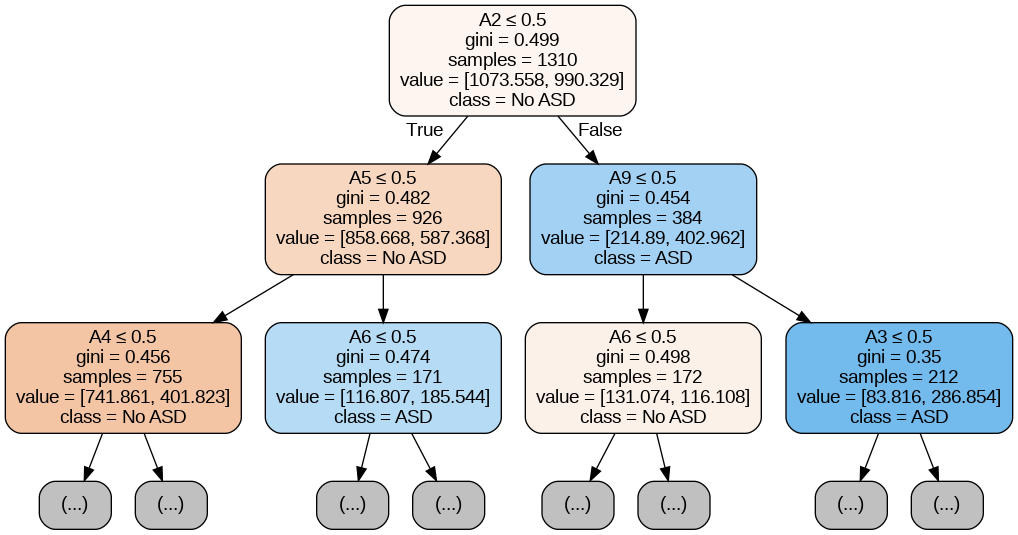

In [15]:
tree_to_plot = rf.estimators_[0]

# Export the tree to Graphviz format
dot_data = export_graphviz(
    tree_to_plot,
    out_file=None,
    feature_names=x_vals.columns,
    class_names=["No ASD", "ASD"],
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=2  # Limit depth to simplify visualization
)

# Render the tree using Graphviz and save as a PNG
graph = graphviz.Source(dot_data)
graph.format = 'png'  # Specify PNG format
graph.render("tree_visualization", cleanup=True)  # Saves as 'tree_visualization.png'

# Display inline (optional, for quick preview in Colab)
from IPython.display import Image
Image(filename="tree_visualization.png")

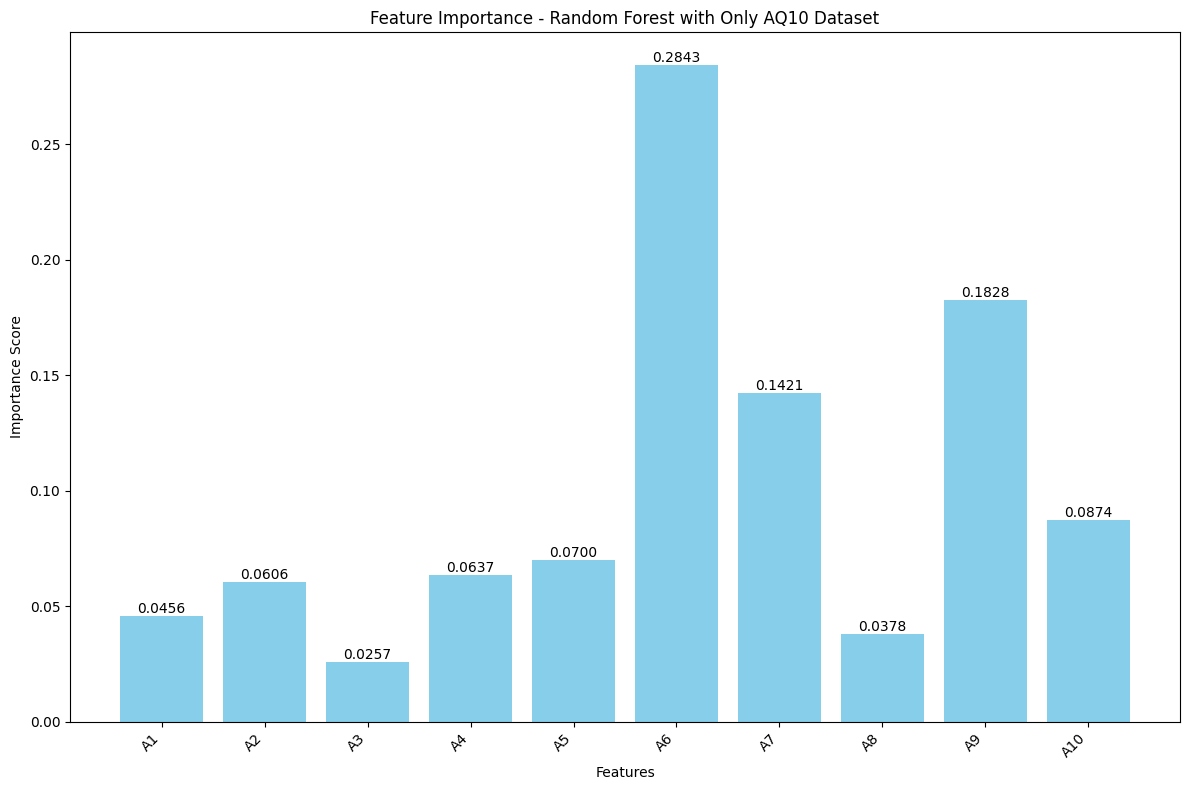

In [16]:
feature_importance = rf.feature_importances_

plt.figure(figsize=(12, 8))
bars = plt.bar(x_vals.columns, feature_importance, color='skyblue')

# Add values on top of each bar
for bar, importance in zip(bars, feature_importance):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),  # Place text at the top of the bar
        f'{importance:.4f}',  # Format the importance value
        ha='center',  # Horizontal alignment
        va='bottom'   # Vertical alignment
    )

plt.title("Feature Importance - Random Forest with Only AQ10 Dataset")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')  # Rotate feature names for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()